In [9]:
# import packages
import pandas as pd
import numpy as np
import unicodedata
from pymongo import MongoClient
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [10]:
# read in data set
final_df = pd.read_csv("model_ready_dataset.csv")

final_df.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,view_count,...,avg_word_len,unique_words,vocab_richness,Rap_Street_Slang_Topic,Romance_Relationships_Topic,Life_Nostalgia_Topic,Party_Dance_Sensuality_Topic,Love_Emotion_Sentiment_Topic,Loss_Struggle_Reflection_Topic,Energy_Vibes_Epic_Topic
0,0.20200,0.759,0.699,0.000131,0.4430,-5.745,0.0307,92.960,0.907,1.118930e+09,...,4.846395,98,0.307210,0.001245,0.001247,0.001247,0.362314,0.385711,0.001244,0.246992
1,0.03930,0.535,0.505,0.000000,0.0923,-8.926,0.2450,99.935,0.495,2.205607e+08,...,5.327024,428,0.450053,0.192193,0.030384,0.000396,0.015850,0.760386,0.000396,0.000396
2,0.54200,0.698,0.533,0.000000,0.3330,-6.246,0.0437,134.001,0.275,8.756409e+07,...,5.063918,141,0.290722,0.000765,0.418962,0.230767,0.000766,0.347208,0.000765,0.000766
3,0.00364,0.767,0.551,0.000000,0.0451,-7.328,0.0616,100.904,0.796,1.049947e+07,...,4.838269,132,0.300683,0.000900,0.000902,0.000901,0.000906,0.994590,0.000900,0.000901
4,0.17500,0.398,0.804,0.000000,0.1810,-5.559,0.0451,186.752,0.709,2.109060e+07,...,5.375000,117,0.365625,0.001012,0.324886,0.046997,0.624069,0.001012,0.001011,0.001014


In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5395 entries, 0 to 5394
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   acousticness                    5395 non-null   float64
 1   danceability                    5395 non-null   float64
 2   energy                          5395 non-null   float64
 3   instrumentalness                5395 non-null   float64
 4   liveness                        5395 non-null   float64
 5   loudness                        5395 non-null   float64
 6   speechiness                     5395 non-null   float64
 7   tempo                           5395 non-null   float64
 8   valence                         5395 non-null   float64
 9   view_count                      5395 non-null   float64
 10  chart_year                      5395 non-null   int64  
 11  type_Group                      5395 non-null   int64  
 12  type_Person                     53

In [12]:
# split into numeric & categorical 
import pandas as pd

# Correct numeric columns
numeric_cols = [
    "acousticness",
    "avg_word_len",
    "danceability",
    "duration_min",
    "energy",
    "instrumentalness",
    "liveness",
    "loudness",
    "speechiness",
    "tempo",
    "unique_words",
    "valence",
    "view_count",
    "word_count"
]

# Create numeric and categorical dataframes
numeric_df = final_df[numeric_cols]

# Columns to keep in the categorical_df
categorical_cols = [
    "begin_year",
    "chart_year"
]

# Build the categorical_df
categorical_df = final_df[categorical_cols].copy()

# establish which are text mining features
text_features = [
    "lyrics_pos", "lyrics_neg", "lyrics_neu", "lyrics_compound",
    "title_pos", "title_neg", "title_neu", "title_compound",
    "lyrics_subjectivity", "vocab_richness",
    "Rap_Street_Slang_Topic", "Romance_Relationships_Topic",
    "Life_Nostalgia_Topic", "Party_Dance_Sensuality_Topic",
    "Love_Emotion_Sentiment_Topic", "Loss_Struggle_Reflection_Topic",
    "Energy_Vibes_Epic_Topic"
]

# make in to data frame
text_df = final_df[text_features]

# Everything else becomes binary_df
binary_df = final_df.drop(columns = numeric_cols +  categorical_cols + text_features)



In [13]:


summary = pd.DataFrame({
    'count': numeric_df.count(),
    'mean': numeric_df.mean(),
    'std': numeric_df.std(),
    'min': numeric_df.min(),
    '25%': numeric_df.quantile(0.25),
    '50%': numeric_df.quantile(0.50),
    '75%': numeric_df.quantile(0.75),
    'max': numeric_df.max(),
    'missing': numeric_df.isna().sum(),
    'skew': numeric_df.skew(),
    'kurtosis': numeric_df.kurt()
})

print(summary)


                  count          mean           std         min           25%  \
acousticness       5395  1.797966e-01  2.183664e-01    0.000008  1.940000e-02   
avg_word_len       5395  5.035746e+00  1.276206e+00    3.497872  4.819391e+00   
danceability       5395  6.494328e-01  1.511963e-01    0.153000  5.460000e-01   
duration_min       5395  3.781050e+00  8.360141e-01    0.789233  3.274442e+00   
energy             5395  6.621884e-01  1.734946e-01    0.054900  5.440000e-01   
instrumentalness   5395  1.257092e-02  8.020043e-02    0.000000  0.000000e+00   
liveness           5395  1.797895e-01  1.379893e-01    0.021000  9.400000e-02   
loudness           5395 -6.387132e+00  2.475078e+00  -23.237000 -7.637000e+00   
speechiness        5395  1.064363e-01  1.070421e-01    0.023000  3.640000e-02   
tempo              5395  1.214436e+02  2.938887e+01   48.718000  9.701100e+01   
unique_words       5395  1.673488e+02  8.324249e+01    1.000000  1.090000e+02   
valence            5395  5.0

Saved as summary_table.png


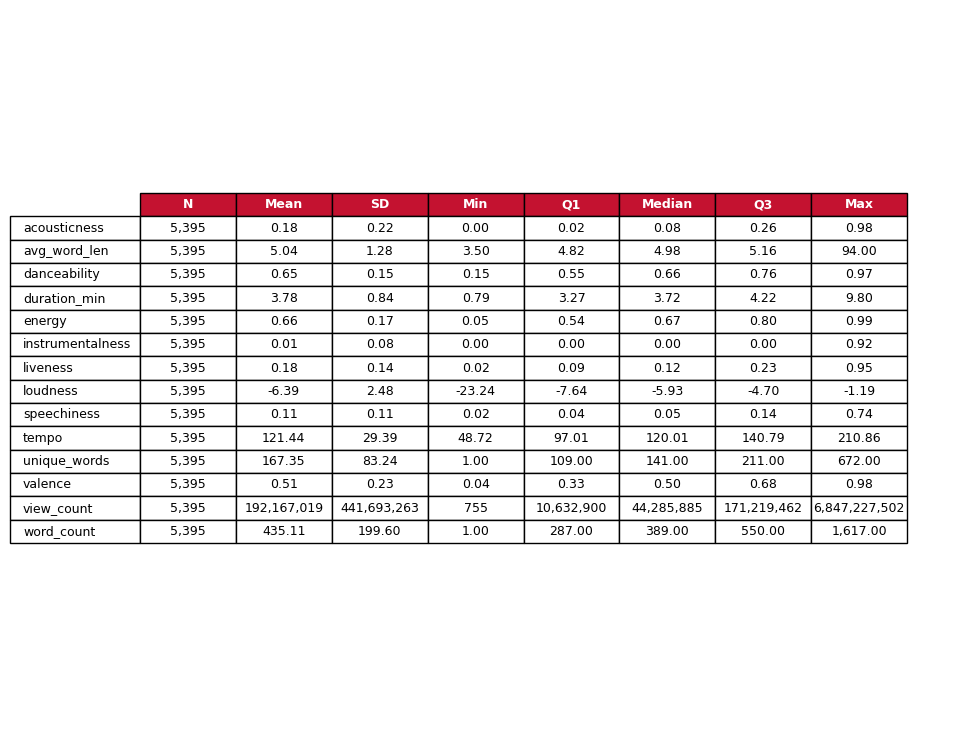

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Specify the integer-format rows (variables) ---
int_rows = ["comment_count", "like_count", "view_count"]

# --- Build summary table ---
summary_table = pd.DataFrame({
    'N': numeric_df.count(),
    'Mean': numeric_df.mean(),
    'SD': numeric_df.std(),
    'Min': numeric_df.min(),
    'Q1': numeric_df.quantile(0.25),
    'Median': numeric_df.quantile(0.50),
    'Q3': numeric_df.quantile(0.75),
    'Max': numeric_df.max()
})

# --- Formatting function ---
def fmt(value, row_name, col_name):
    if isinstance(value, (int, float)):
        # Rule 1: N column always no decimals
        if col_name == "N":
            return f"{value:,.0f}"
        # Rule 2: Integer-like variables have no decimals
        if row_name in int_rows:
            return f"{value:,.0f}"
        # Rule 3: All other cells get 2 decimals
        return f"{value:,.2f}"
    return value

# Apply formatting
formatted = summary_table.copy()
for col in summary_table.columns:
    formatted[col] = [
        fmt(val, row, col) for row, val in zip(summary_table.index, summary_table[col])
    ]

summary_table = formatted

# --- Create figure ---
fig, ax = plt.subplots(figsize=(11, 3 + len(summary_table) * 0.45))
ax.axis('off')

# Create table
table = ax.table(
    cellText=summary_table.values,
    rowLabels=summary_table.index,
    colLabels=summary_table.columns,
    loc='center',
    cellLoc='center'
)

# Styling
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(0.9, 1.4)

# Header styling
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#c41230')

plt.savefig("summary_table.png", dpi=300, bbox_inches='tight')
print("Saved as summary_table.png")


## categorical

In [15]:
import pandas as pd

# Function to summarize categorical variables
def summarize_categorical(df):
    summary = pd.DataFrame({
        "n_unique": df.nunique(),
        "top": df.mode().iloc[0],             # most frequent category
        "freq_top": df.apply(lambda x: x.value_counts().iloc[0]),
        "missing": df.isna().sum(),
        "missing_pct": df.isna().mean().round(3)
    })

    # Clean formatting for presentation
    summary = summary.reset_index().rename(columns={"index": "variable"})
    summary = summary.sort_values("variable").reset_index(drop=True)
    return summary

# Generate the table
summary_table = summarize_categorical(categorical_df)

# Display
summary_table

,variable,n_unique,top,freq_top,missing,missing_pct
0,begin_year,117,1989,214,0,0.0
1,chart_year,36,2018,401,0,0.0


Saved as categorical_summary_table.png


/opt/tljh/user/lib/python3.12/site-packages/matplotlib/table.py:824: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text=rowLabels[row], facecolor=rowColours[row],


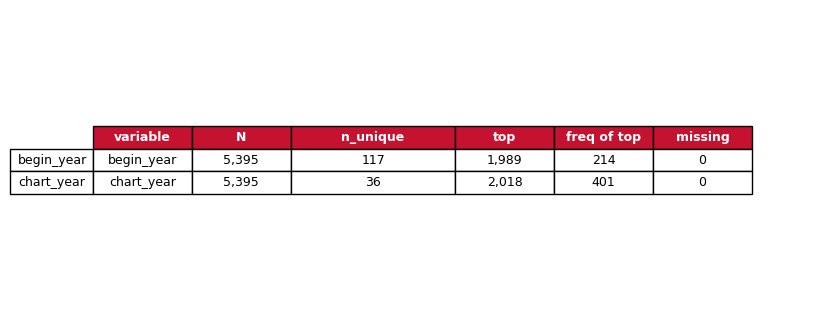

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# drop from categorical df to better support the table
categorical_df = categorical_df.drop(columns=["genres", "lyrics", "title"], errors="ignore")


# --- Function to summarize categorical variables safely ---
def summarize_categorical(df):
    top_values = []
    freq_values = []

    for col in df.columns:
        if df[col].dropna().empty:
            top_values.append("")        # no top value
            freq_values.append(0)        # count = 0
        else:
            mode_val = df[col].mode().iloc[0]
            top_values.append(mode_val)
            freq_val = df[col].value_counts().iloc[0]
            freq_values.append(freq_val)

    summary = pd.DataFrame({
        "variable": df.columns,
        "N": df.count(),
        "n_unique": df.nunique(),
        "top": top_values,
        "freq of top": freq_values,
        "missing": df.isna().sum()
    })

    return summary

# --- Generate summary table ---
summary_table = summarize_categorical(categorical_df)

# --- Formatting function ---
def fmt_categorical(value, col_name):
    if isinstance(value, (int, float)):
        if "pct" in col_name.lower():
            return f"{value:.1f}"
        return f"{value:,.0f}"
    return str(value)

# Apply formatting
formatted = summary_table.copy()
for col in summary_table.columns:
    formatted[col] = [fmt_categorical(val, col) for val in summary_table[col]]

summary_table = formatted

# --- Create figure ---
fig, ax = plt.subplots(figsize=(10, 3 + len(summary_table) * 0.45))
ax.axis('off')

# Shrink column widths safely
num_cols = len(summary_table.columns)
col_widths = [0.15, 0.15, 0.25, 0.15, 0.15, 0.15]  # adjust to fit nicely

# Create table
table = ax.table(
    cellText=summary_table.values,
    rowLabels=summary_table["variable"],
    colLabels=summary_table.columns,
    loc='center',
    cellLoc='center',
    colWidths=col_widths
)

# Styling
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(0.85, 1.35)

# Header styling
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#c41230')

plt.savefig("categorical_summary_table.png", dpi=300, bbox_inches='tight')
print("Saved as categorical_summary_table.png")



## text mining

/tmp/ipykernel_679458/3544361229.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_text = text_summary.applymap(fmt_number)


Saved as text_feature_summary_table.png


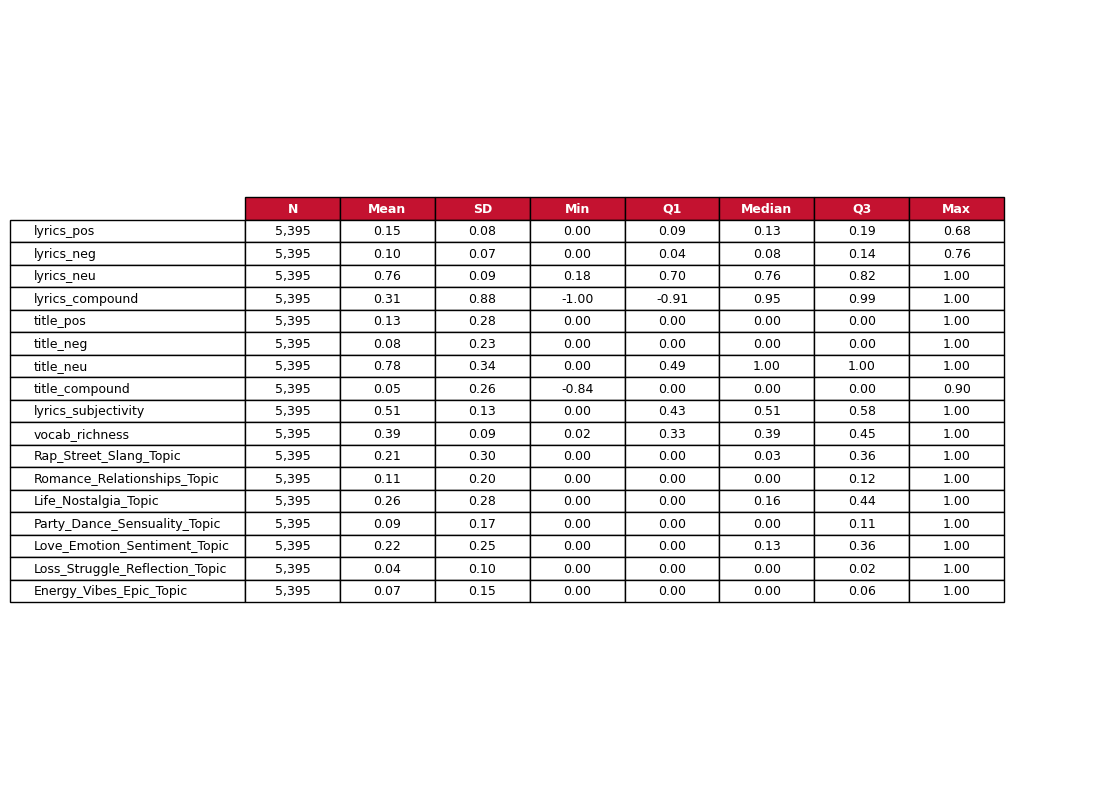

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# establish needed summary stats
text_summary = pd.DataFrame({
    "N": text_df.count(),
    "Mean": text_df.mean(),
    "SD": text_df.std(),
    "Min": text_df.min(),
    "Q1": text_df.quantile(0.25),
    "Median": text_df.median(),
    "Q3": text_df.quantile(0.75),
    "Max": text_df.max()
})

# maintain consistent, presentation-ready formatting

def fmt_number(x):
    if isinstance(x, (int, float)):
        # large numbers → comma formatting, no decimals
        if abs(x) >= 1000:
            return f"{x:,.0f}"
        # decimals → 2 decimal places
        return f"{x:.2f}"
    return x

formatted_text = text_summary.applymap(fmt_number)

# create the table
fig, ax = plt.subplots(figsize=(12, 3 + len(formatted_text) * 0.42))
ax.axis('off')

col_widths = [0.12] * len(formatted_text.columns)

table = ax.table(
    cellText=formatted_text.values,
    rowLabels=formatted_text.index,
    colLabels=formatted_text.columns,
    loc='center',
    cellLoc='center',
    colWidths=col_widths
)

# Formatting
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(0.85, 1.35)

# Header styling (red background, white bold text)
for (row, col), cell in table.get_celld().items():
    if row == 0:  # header row
        cell.set_facecolor("#c41230")
        cell.set_text_props(weight="bold", color="white")

plt.savefig("text_feature_summary_table.png", dpi=300, bbox_inches='tight')
print("Saved as text_feature_summary_table.png")


## binary

In [18]:
import pandas as pd

# --- Function to summarize binary variables ---
def summarize_binary(df):
    summary = pd.DataFrame({
        "N": df.count(),

        "Num_1": df.sum(),                     # assumes values are 0/1
        "Num_0": df.shape[0] - df.sum() - df.isna().sum(),

        "Pct_1": (df.mean() * 100).round(1),   # mean of 0/1 = proportion of 1s
        "Pct_0": (1 - df.mean()) * 100
    })

    summary["Pct_0"] = summary["Pct_0"].round(1)

    # Clean up formatting
    summary = summary.reset_index().rename(columns={"index": "variable"})
    return summary

# --- Create summary table ---
binary_summary_table = summarize_binary(binary_df)

binary_summary_table


,variable,N,Num_1,Num_0,Pct_1,Pct_0
0,type_Group,5395,1455,3940,27.0,73.0
1,type_Person,5395,3940,1455,73.0,27.0
2,country_CA,5395,335,5060,6.2,93.8
3,country_GB,5395,562,4833,10.4,89.6
4,country_Other,5395,617,4778,11.4,88.6
5,country_US,5395,3881,1514,71.9,28.1
6,key_C,5395,564,4831,10.5,89.5
7,key_C_Sharp,5395,716,4679,13.3,86.7
8,key_D,5395,453,4942,8.4,91.6
9,key_D_Sharp,5395,170,5225,3.2,96.8


Saved as binary_summary_table.png


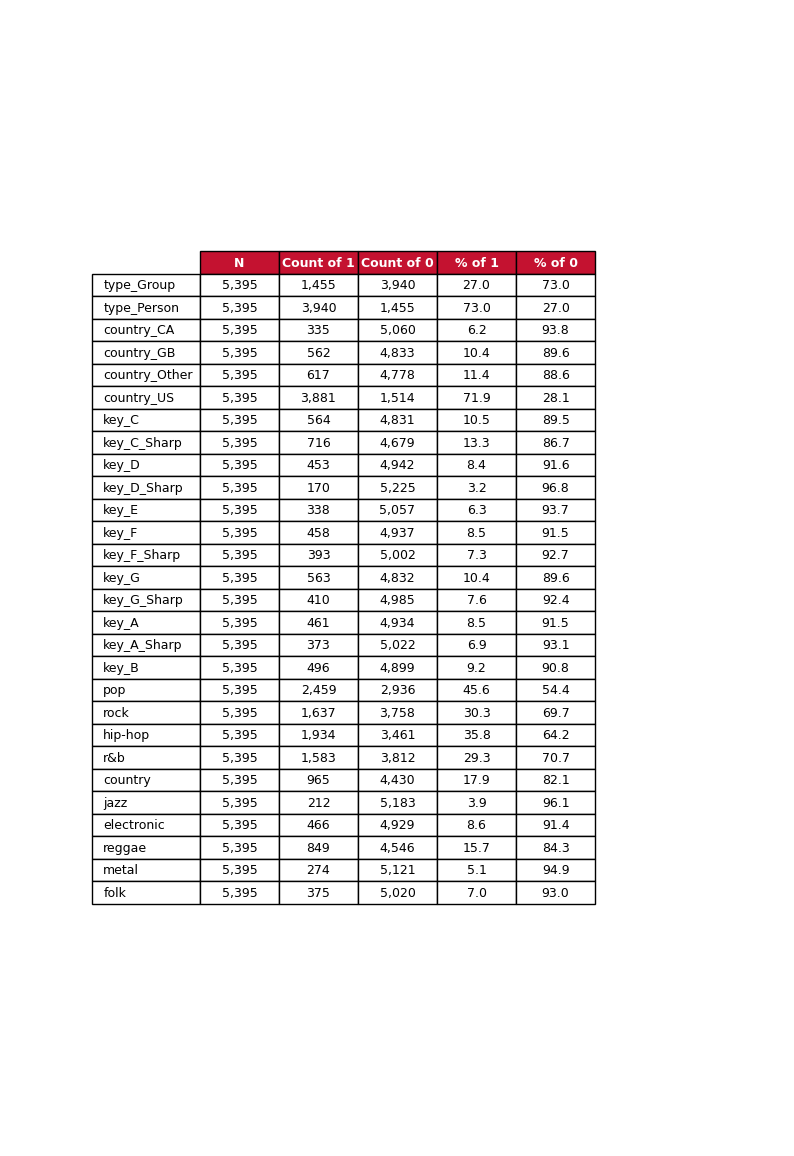

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Build binary summary table ---
binary_summary = pd.DataFrame({
    "N": binary_df.count(),
    
    "Count of 1": binary_df.sum(),
    "Count of 0": binary_df.shape[0] - binary_df.sum() - binary_df.isna().sum(),

    "% of 1": (binary_df.mean() * 100).round(1),
    "% of 0": ((1 - binary_df.mean()) * 100).round(1)
})

# --- Formatting function ---
def fmt_binary(value):
    if isinstance(value, (int, float)):
        if isinstance(value, float) and (0 < value < 100):
            return f"{value:.1f}"
        return f"{value:,.0f}"
    return value

# Apply formatting
formatted = binary_summary.copy()
for col in binary_summary.columns:
    formatted[col] = [fmt_binary(val) for val in binary_summary[col]]

summary_table = formatted

# --- Create figure ---
fig, ax = plt.subplots(figsize=(10, 3 + len(summary_table) * 0.42))
ax.axis('off')

# --- Shrink column widths safely ---
num_cols = len(summary_table.columns)
col_widths = [0.12] * num_cols   # adjust this value if needed (smaller = more compact)

# Create table with controlled column width
table = ax.table(
    cellText=summary_table.values,
    rowLabels=summary_table.index,
    colLabels=summary_table.columns,
    loc='center',
    cellLoc='center',
    colWidths=col_widths
)

# Styling
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(0.85, 1.35)   # slightly tighter but still readable

# Header styling
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#c41230')

plt.savefig("binary_summary_table.png", dpi=300, bbox_inches='tight')
print("Saved as binary_summary_table.png")
